<center><font face="Times New ROman" size="10" color="#000080">- Krigagem -</font></center>
<br>
<br><center><font face="Times New ROman" size="6" color="#000000">- Impedância</font>

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pylab import *
from krigagem import *
from random import randint
from operator import itemgetter
import datetime

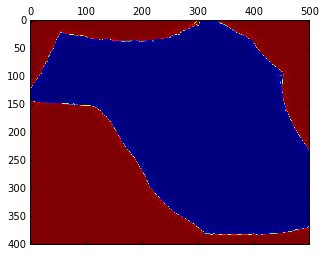

In [2]:
MA = np.load('mapa_matrix.npy')
matshow(MA)
show()

<br><center><font face="Times New ROman" size="6" color="#000000">- Importando Dados -</font>

In [3]:
poc2  = ['NA02','NA04','NA07','NA12','NA37','RJS0019','RJS0042']

poc3 = []
for i in range(len(poc2)):
    poc3.append(poc2[i].replace("NA","na"))
    
val = []
for i in range(len(poc2)):
    val.append('../banco_de_dados_krig/'+str(poc3[i])+"_mario.dat")

DATA = np.array([[[0]*17]*1313]*len(poc2),float) # [p,c,l] [k,j,i] = profundidade, coluna, linha

print (shape(DATA))

#--------------------------------------------------------------------------------------------------------------------#

for k in range(len(poc2)): #<- Alterar para len(poc2) para incluir todos os pocos use 2 ou 3 pra testar
    data2  = np.fromfile(val[k], dtype=float, count=-1, sep='	')
    p2  = len(data2)/17
    data2  = np.reshape(data2, (len(data2)/17,17))
    
    for j in range (1313):
        for i in range(17):
            DATA[k,j,i] = data2[j,i]
    

(7, 1313, 17)


<br><center><font face="Times New ROman" size="6" color="#000000">- Variograma -</font>

25361.5072286
4307.35417629  max D
4307.35417629  max DU


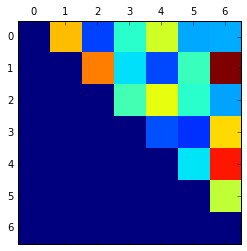

In [4]:
#-----------------------Matriz Triangular de Distancias---------------------------#
AX2 = []
AY2 = []


for i in range (len(DATA[:,0,0])):
    AX2.append(int(DATA[i,0,0]/10.0))
    AY2.append(int(DATA[i,0,1]/10.0))

V   = DATA[:,578,8] # V = Impedancia acustica de KM
scale = 10

print (mean(V))

#---------------------------------------------------------------------------------#

D = np.array([[0]*len(AY2)]*(len(AX2)),float) # D = matriz de distancias 
    
for j in range (len(AY2)):
    for i in range (len(AX2)):
        D[j,i] = scale*(np.sqrt((AY2[j] - AY2[i])**2 + (AX2[j] - AX2[i])**2))

print (np.max(D),' max D')


DU = np.triu(D) # funcao matriz retangular/Matriz de distancias sem repeticao
print (np.max(DU),' max DU')

matshow(DU,cmap=cm.jet) # Distancias pela matriz triangular
show()

In [5]:
#----------------------------------Variograma-------------------------------------#

# numero de elementos no range (evitar passar muito de 25)

num0 = 10

#-------------------------------------------------------------------------------
num = num0+1

rang = np.linspace(np.min(DU),np.max(DU),num) # escolhe o range de valores
print ('range determinado pelos valores maximos e minimos:',len(rang),'elementos')
print ()
print (rang)

range1 = [] # range da base
range2 = [] # range da ponta

#-------------------------------------------------------------------------------

for i in range(num-1):
    range1.append(rang[i])
    range2.append(rang[i+1])

#-------------------------------------------------------------------------------

print ()
print ('range de valores minimos;',len(range1),'elementos')
print ()
print (range1)
print ()
print ('range de valores maximos;',len(range2),'elementos')
print ()
print (range2)

range determinado pelos valores maximos e minimos: 11 elementos

[    0.           430.73541763   861.47083526  1292.20625289  1722.94167052
  2153.67708814  2584.41250577  3015.1479234   3445.88334103  3876.61875866
  4307.35417629]

range de valores minimos; 10 elementos

[0.0, 430.73541762896627, 861.47083525793255, 1292.2062528868987, 1722.9416705158651, 2153.6770881448315, 2584.4125057737974, 3015.1479234027638, 3445.8833410317302, 3876.6187586606966]

range de valores maximos; 10 elementos

[430.73541762896627, 861.47083525793255, 1292.2062528868987, 1722.9416705158651, 2153.6770881448315, 2584.4125057737974, 3015.1479234027638, 3445.8833410317302, 3876.6187586606966, 4307.354176289663]


In [6]:
SH = np.shape(D)
print ( SH,'forma da matriz de distancias')

d1 = [] # Codigo
d2 = [] # Range superior
d3 = [] # Range Inferior
d4 = [] # Valor da distancia
d5 = [] # F(V[j],V[i])

for k in range (num-1):
    for j in range (SH[0]):
        for i in range (SH[1]):
            if DU[j,i] > range1[k] and DU[j,i] <= range2[k]: # maior ao inves de maior e igual, retira os zeros
                d1.append(k)
                d2.append(range1[k])
                d3.append(range2[k])
                d4.append(DU[j,i])
                d5.append((V[j] - V[i])**2)
                #print 'cod-',k,'rang-',range1[k],range2[k],'val-',DU[j,i],'res =',(V[j] - V[i])**2 # dados armazenados
            
#print d1
cod1 = np.linspace(min(d1),max(d1),max(d1)+1) # ou max(d1)+1, depende do valor de 'num'
print ()
print ('as ',num0,' categorias escolhidas em codigo ')
print ()
print (cod1)
print ()
print ('!!!ATENCAO!!!: estes numeros devem ser inteiros. Exemplo: (0.  1.  2. ...  n.)')
print ('se nao forem inteiros, altere o valor de num0')
#print d1
vall = [0.0]*len(cod1)

(7, 7) forma da matriz de distancias

as  10  categorias escolhidas em codigo 

[ 1.          1.88888889  2.77777778  3.66666667  4.55555556  5.44444444
  6.33333333  7.22222222  8.11111111  9.        ]

!!!ATENCAO!!!: estes numeros devem ser inteiros. Exemplo: (0.  1.  2. ...  n.)
se nao forem inteiros, altere o valor de num0


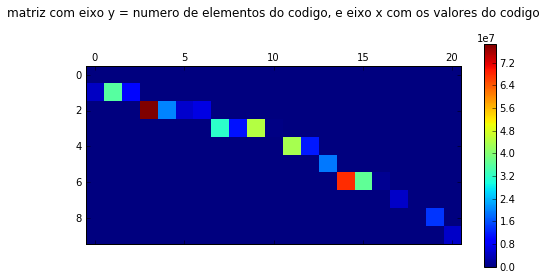

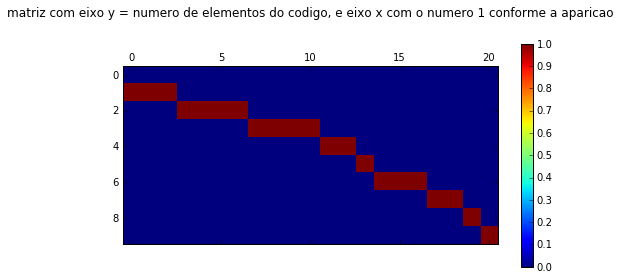

In [7]:
#------------------------------------------------------------------#
SSD = [1]*(len(d1))

ES = np.array([[0.0]*len(d1)]*len(cod1),float)
EO = np.array([[0.0]*len(d1)]*len(cod1),float)


for j in range (len(cod1)):
    for i in range (len(d1)):
        if d1[i] == j:
            ES[j,i] = d5[i]
            EO[j,i] = SSD[i]
            
#------------------------------------------------------------------#
print ()
matshow(ES,cmap=cm.jet) # Distancias pela matriz triangular
plt.title('matriz com eixo y = numero de elementos do codigo, e eixo x com os valores do codigo',y=1.25)
colorbar()
print ()
matshow(EO,cmap=cm.jet)
plt.title('matriz com eixo y = numero de elementos do codigo, e eixo x com o numero 1 conforme a aparicao',y=1.25)
colorbar()
show()

/home/mario/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:8: RuntimeWarning: divide by zero encountered in double_scalars
/home/mario/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:8: RuntimeWarning: invalid value encountered in double_scalars


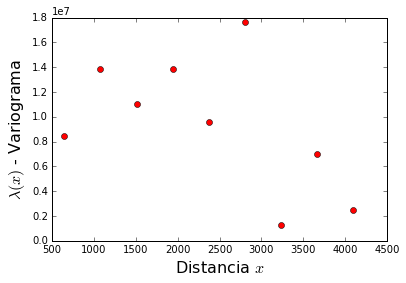

In [20]:
#------------------------------------------------------------------#

SS  = ES.sum(axis=1) # soma dos valores das propriedades
SSO = EO.sum(axis=1) # numero de ocorrencias da pripriedade no intervalo
    
VI = []
for i in range (len(SS)):
    VI.append((1/(2.0000*SSO[i]))*SS[i])
    
rang_mid = [] # range de valor medio
for i in range(len(range1)):
              rang_mid.append( (range1[i]+range2[i])/2.0 )  
    
#------------------------------------------------------------------#
# constantes variograma

C0 = 0
C1 = 10000000
a  = 3000.000

#------------------------------------------------------------------#
fit = []
for i in range (len(rang_mid)):
    fit.append(C0+C1*(1 - np.exp(-3*(rang_mid[i])/a)))

plt.plot(rang_mid,VI,'or')
#plt.plot(rang_mid,fit,'-b',linewidth = 3)
plt.xlabel('Distancia $x$',fontsize=16)
plt.ylabel('$\lambda (x) $ - Variograma',fontsize=16)
plt.show()

<br><center><font face="Times New ROman" size="6" color="#000000">- Krigagem -</font>

In [32]:
X2 = []
Y2 = []
for i in range (len(AX2)):
    X2.append(AX2[i]-35100)
    Y2.append(751900 - AY2[i])
print X2

[196, 442, 227, 358, 438, 288, 104]


In [33]:
#-----------------------------------------------------------------------
#-------------ATENCAO: CODIGO PESADO------------------------------------
tempo_0 = datetime.datetime.now()
#-----------------------------------------------------------------------
grid = [500,400]

SS = np.array([[0]*grid[0]]*grid[1],float)

MA = np.load('mapa_matrix.npy') # mapa com o contorno

for i in xrange(len(X2)):
    SS[Y2[i],X2[i]] = V[i]
    
#----------------------------------------------------------#

DS = np.array([[0]*grid[0]]*grid[1],float)

for j in xrange (grid[1]):
    for i in xrange (grid[0]):
        if MA[j,i] == 255:
            DS[j,i] = nan
        else:
            DS[j,i] = kri(j,i,X2,Y2,V,grid,C0,C1,a,scale)

DD = DS

for j in xrange (grid[1]):
    for i in xrange (grid[0]):
        if SS[j,i] != 0:
            DD[j,i] = SS[j,i]
#-----------------------------------------------------------------------
tempo_1 = datetime.datetime.now()
tempo_final = tempo_1 - tempo_0
#----------------------------------------------------------------------- 
print 'terminada, levou:',tempo_final

terminada, levou: 0:00:51.723000


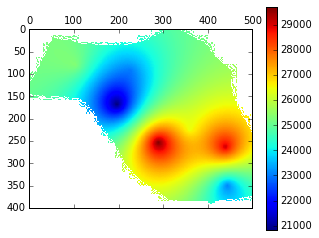

In [34]:
RRR = DS

for j in range (grid[1]):
    for i in range (grid[0]):
        if DS[j,i] != nan:
            RRR[j,i] = DS[j,i]
        else:
            RRR[j,i] = nan
        

np.save('imp_obs_mapa876',RRR)

matshow(DD,cmap=cm.jet)
colorbar()
show()